In [29]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [30]:
#code from the UCI Data Repository: https://doi.org/10.24432/C5MG6K
pen_based_recognition_of_handwritten_digits = fetch_ucirepo(id=81) 
X = pen_based_recognition_of_handwritten_digits.data.features
y = pen_based_recognition_of_handwritten_digits.data.targets

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=598)

## Parts (a), (b), (c) - Fit Models

In [31]:
#fit SVM, decision tree classifier, AdaBoost, Gradient Boosting
svm_model = SVC(kernel='rbf', random_state=598)
svm_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=598)
dt_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier(random_state=598)
ab_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(random_state=598)
gb_model.fit(X_train, y_train)

c:\Users\manas\Downloads\Courses\FA25\CS598PSL\cs-598-psl\assignment3\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manas\Downloads\Courses\FA25\CS598PSL\cs-598-psl\assignment3\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manas\Downloads\Courses\FA25\CS598PSL\cs-598-psl\assignment3\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


## Part (d) - Train and Test Accuracies

In [32]:
#Accuracy for all classifiers in both training and testing data
models = [('Gaussian SVM', svm_model), ('Decision Tree', dt_model), ('AdaBoost', ab_model), ('Gradient Boosting', gb_model)]

results = []
confusion_matrix_results = []

for name, model in models:
    #training data
    y_pred_train = model.predict(X_train)
    train_accuracy = model.score(X_train, y_train)

    #testing data
    y_pred_test = model.predict(X_test)
    test_accuracy = model.score(X_test, y_test)
    results.append({"Model": name, "Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy})

    #get confusion matrix for test data for part e
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
    confusion_matrix_results.append((name, confusion_matrix_test))

results_df = pd.DataFrame(results)
print(results_df)

               Model  Train Accuracy  Test Accuracy
0       Gaussian SVM        0.995191       0.994239
1      Decision Tree        1.000000       0.958156
2           AdaBoost        0.619054       0.620376
3  Gradient Boosting        1.000000       0.984536


## Training and testing accuracies 

| Model | Train Accuracy | Test Accuracy |
|---|---|---|
| Gaussian SVM | 0.995191 | 0.994239 |
| Decision Tree | 1.000000 | 0.958156 |
| AdaBoost | 0.619054 | 0.620376 |
| Gradient Boosting | 1.000000 | 0.984536 |

## Part (e) - Confusion Matrices

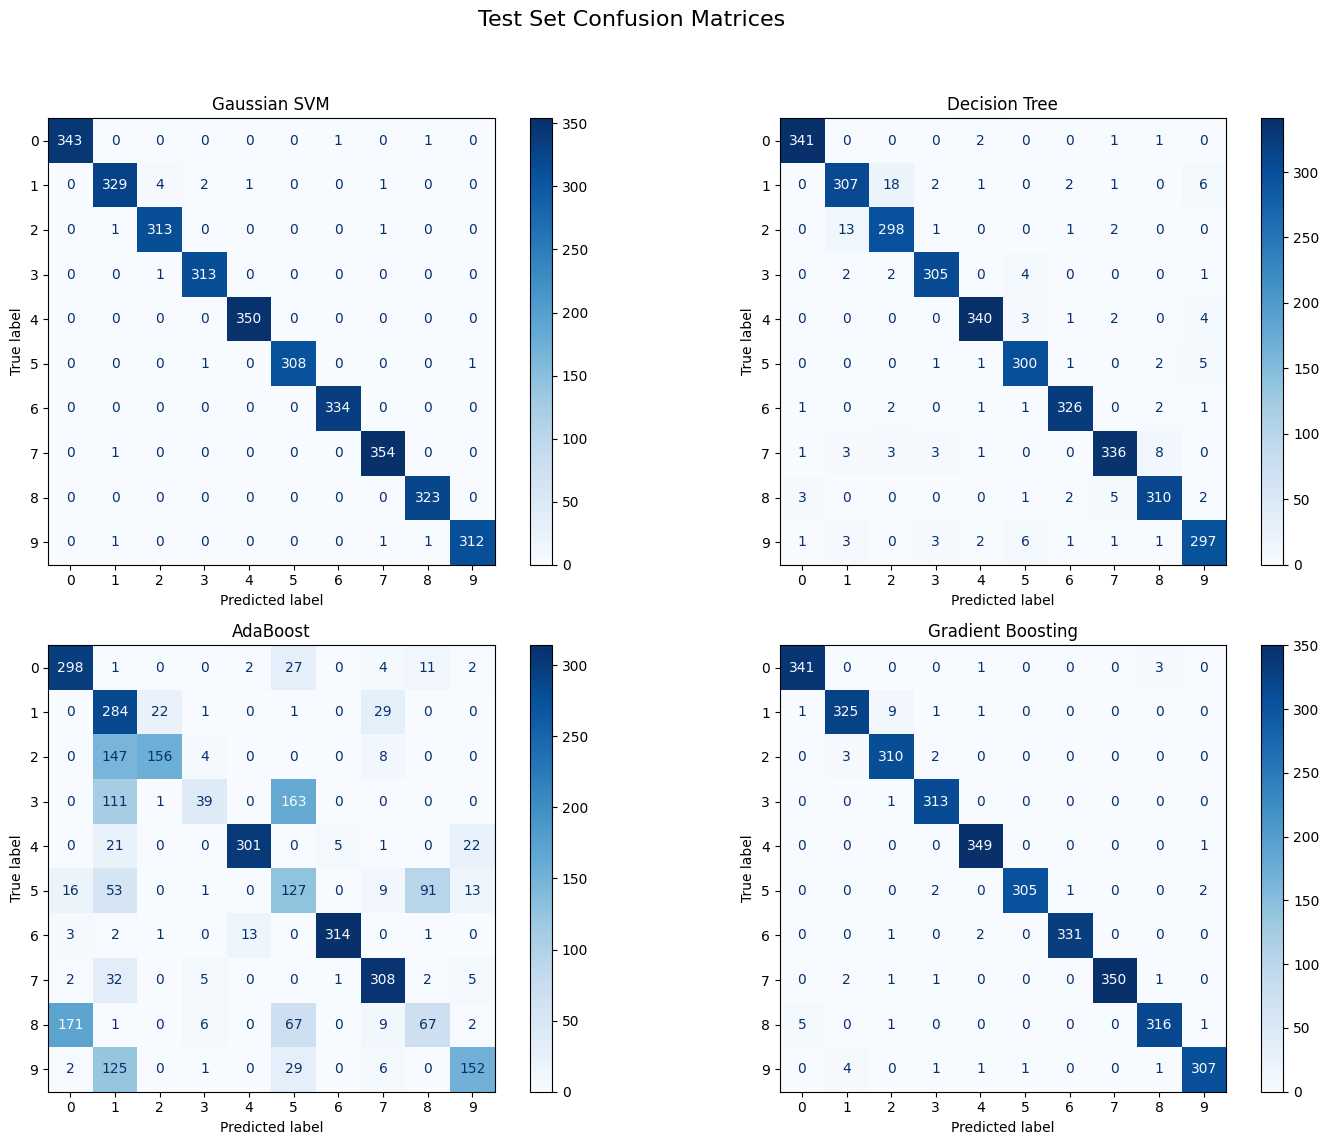

In [ ]:
#Show confusion matrices for test predictions
labels = np.unique(y)
labels.sort()
target_names = [str(label) for label in labels]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Test Set Confusion Matrices', fontsize=16)
axes_flat = axes.flatten()

for (name, cm), ax in zip(confusion_matrix_results, axes_flat):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=ax, cmap='Blues')    
    ax.set_title(f'{name}')

num_plots = len(confusion_matrix_results)
for i in range(num_plots, len(axes_flat)):
    axes_flat[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Part (f) - Comments on Results

Overall, the Gaussian SVM and Gradient Boosting models performed the best, with testing accuracies of 0.994239 and 0.984536, respectively. The Decision Tree was also very good but made more errors, acheiving a testing accuracy of 0.958156. The AdaBoost model did not perform well with a testing accuracy of 0.620376, showing a lot of confusion and an inability to model the data effectively.

### Analysis of Individual Confusion Matrices

* SVM with a Guassian Kernel (accuracy 0.994239): This was the best performer on the data. The diagonal is nearly perfect, meaning almost all digits were classified correctly. The errors are minimal and spread out.

* Gradient Boosting (accuracy 0.984536): This model was the second best, performing almost as well as the SVM, with a very clean diagonal. The most significant errors were misclassifying 9 true '1's as '2's and misclassifying 5 true '8's as '0's, but these are very small errors.

* Decision Tree (accuracy 0.958156): This model was the third best, and had a small, but significant decrease in accuracy from the best two models. While it got most predictions right, the number of errors is much higher. There seems to be a strong confusion between '1' and '2' (18 true '1's were called '2's, and 13 true '2's were called '1's). There were also other errors, which are visible in the confusion matrix.

* AdaBoost (accuracy 0.620376): This model performed the worst and didn't model the data properly. The confusion matrix shows a lot of errors, and the diagonal values for a lot of classes are very low. For example:
    * It was very bad at classifying '8's, with only 67 correct classifications and 171 true '8's being misclassified as '0'.
    * It was very bad at identifying '3', with only 39 correct classifications, 163 true '3's misclassified as '5', and 111 true '3's misclassified as '1'.
    * It also heavily confused '2's and '9's with '1's.

### Which are the digits that seem to be most commonly confused?

Based on the confusion matrices, the most common confusions are:

* Misclassifying '1' as '2': This was the biggest problem for the Decision Tree and a massive issue for AdaBoost. Even the SVM and Gradient Boosting had their largest errors on '1' and '2'.

* Misclassifying '9' as '1': We saw this in every model, though with small errors in all models other than AdaBoost.

* Misclassifying '8' as '0': We saw this in every model other than SVM, with Adaboost having the largest error across all models at 171 misclassifiactions on this pair.

* Misclassifying '2' as '1': We saw this in every model but the SVM.

* Misclassifying '3' as '5': We saw this in AdaBoost (163 errors) and Decision Tree (4 errors).

### Did you have any overfitting issues with any of the approaches?

The accuracy table clearly identifies which models overfit the data.

* Gaussian SVM: No. This model is the best example of a good fit. The training accuracy (0.995191) and testing accuracy (0.994239) are pretty much the same (difference of 0.000952). This drop of 0.1% is negligible, meaning it learned the patterns without memorizing the noise, which is why it was the best performer on the testing data.

* Gradient Boosting: Yes, but it was small. The training accuracy (1.000000) and testing accuracy (0.984536) are close (difference of 0.015464). This drop of 1.5% is technically overfitting, the drop is much smaller, and the model was still very accurate and generalizable.

* Decision Tree: Yes. This is the first example where we can see proper overfitting. The training accuracy (1.000000) and testing accuracy (0.958156) are close (difference of 0.041844). This drop of 4.2% shows it memorized the training data and didn't generalize perfectly to new data, even though it is relatively small.

* AdaBoost: No. This model was actually underfitting. We know this because the model performed poorly on both the training data (accuracy 0.619054) and the testing data (accuracy 0.620376). Though the difference between the two accuracies is small, this is underfitting because the accuracy is low overall, meaning model was suitable to capture the patterns in the data.